Collatz self contained notebook

In [1]:
"""
This notebook analyses collatz sequences that lead to self contained numbers. Self contained
means in this context that an odd collatz number leads to an even collatz number that is 
a multiple of the odd number. The odd number 31 e.g. results for k= 3 in the even number 
310 which equals 10 * 31.
"""

# Imports
from math import log2
from matplotlib import pyplot as plt
import random as rnd
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 1001
K_FACTOR = 3
MAX_ITERATIONS = 300
ODDS_ONLY = True
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

START_VALUE = 671

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.float_format', None)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Filter odd values
analysis_frame = analysis_frame[analysis_frame["odd"] == 1]
analysis_frame = analysis_frame.reset_index(drop=True)

# Drop last row if sequences has ended with 1
if len(analysis_frame) > 1 & int(analysis_frame.tail(1)["collatz"]) == 1:
    analysis_frame = analysis_frame[:-1]

# Derive new fields
analysis_frame["n"] = analysis_frame.index + 1

analysis_frame["beta"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"])
analysis_frame["beta_prod"] = analysis_frame["beta"].cumprod()

analysis_frame["sigma"] = K_FACTOR + (1 / analysis_frame["collatz"])
analysis_frame["sigma_prod"] = analysis_frame["sigma"].cumprod()
analysis_frame["sigma_prod"] = analysis_frame["sigma_prod"]
analysis_frame["sigma_natural"] = analysis_frame["sigma_prod"] % 1 == 0

analysis_frame["alpha"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha"] = analysis_frame["alpha"].astype('int64')
analysis_frame["alpha_pred"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1
analysis_frame["alpha_sum"] = analysis_frame["alpha"].cumsum()

analysis_frame["v1"] = START_VALUE
analysis_frame["n"] = analysis_frame.index + 1

analysis_frame["multiple"] = analysis_frame["next_odd"] / analysis_frame["v1"]
analysis_frame["self_contained"] = (analysis_frame["multiple"] % 1 == 0) &  \
                                   (analysis_frame["multiple"] > 1) 

# Print results
is_self_contained = analysis_frame["self_contained"].sum() >= 1
is_sigma_natural = (analysis_frame["sigma_natural"]).sum() >= 1

print_frame = analysis_frame[[
    "n", "v1", "collatz", "next_odd", "multiple",  
    "self_contained", "beta", "beta_prod", 
    "alpha_sum", "sigma_prod", "sigma_natural"]]

print_frame.columns = [
    "n","v1", "vi", "vi+1", "m", "sc", "b", "b_prod", 
    "a_sum", "s_prod", "s_natural"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      " Self contained:", is_self_contained,
      " Sigma natural:", is_sigma_natural,
      "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")
    

Start value: 671  K: 3  Self contained: True  Sigma natural: True 

  n   v1     vi   vi+1      m     sc     b  b_prod  a_sum               s_prod  s_natural
  1  671    671   1007  1.501  False 1.000   1.000      1                3.001      False
  2  671   1007   1511  2.252  False 1.000   1.001      2                9.007      False
  3  671   1511   2267  3.379  False 1.000   1.001      3               27.028      False
  4  671   2267   3401  5.069  False 1.000   1.001      4               81.097      False
  5  671   3401   2551  3.802  False 1.000   1.001      6              243.314      False
  6  671   2551   3827  5.703  False 1.000   1.001      7              730.039      False
  7  671   3827   5741  8.556  False 1.000   1.002      8             2190.307      False
  8  671   5741   2153  3.209  False 1.000   1.002     11             6571.303      False
  9  671   2153   1615  2.407  False 1.000   1.002     13            19716.960      False
 10  671   1615   2423  3.611  F

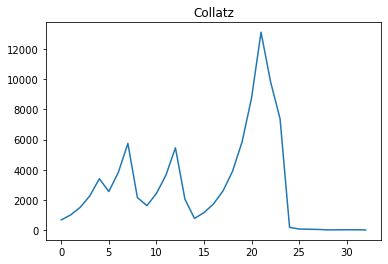

In [2]:
# Plot results
plt.figure()
plt.title("Collatz")
plt.plot(analysis_frame["collatz"], "-")